In [2]:
a="123123"
for each in enumerate(a):
    print(each)

(0, '1')
(1, '2')
(2, '3')
(3, '1')
(4, '2')
(5, '3')


In [17]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("CaptstoneProjectData_2025.csv", encoding="ISO-8859-1", header=0)
df = df.iloc[:, :2]

df['Body'] = df['Body'].str.replace('Notice: This message was sent from outside the University of Victoria email system. Please be cautious with links and sensitive information.', '').str.strip()
df['Subject'] = df['Subject'].str.replace('***SPAM Suspected*** ', '').str.strip()
df


,Subject,Body
0,Â®Review your shipment details / Shipment Noti...,[https://www.canadapost-postescanada.ca/cpc/as...
1,Î¥Ð¾urâ Ð°ÑÑÐ¾untâ ÑÑâ Ð¾nâ hÐ¾ld,Votre rÃ©ponse a bien Ã©tÃ© prise en compte.\r...
2,Completed: Invoice # KZ89TYS2564 from-Bestbuy....,[DocuSign]\r\n[https://NA4.docusign.net/member...
3,UVic IMPORTANT NOTICE!,Your UVIC account has been filed under the lis...
4,You have (6) Suspended incoming messages,Message generated from uvic.ca source.\r\n\r\...
...,...,...
2571,Update needed (5) inbox messages Pending befor...,"lawfa@uvic.ca\r\n\r\nPending messages, Update ..."
2572,Update needed (5) inbox messages Pending befor...,"lawfa@uvic.ca\r\n\r\nPending messages, Update ..."
2573,"Re: All Staff/Employee,","All Staff/Employee,\r\n\r\n\r\n\r\nAs COVID-19..."
2574,Notification Update,"Dear user,\r\n\r\n\r\nWe recently encountered ..."


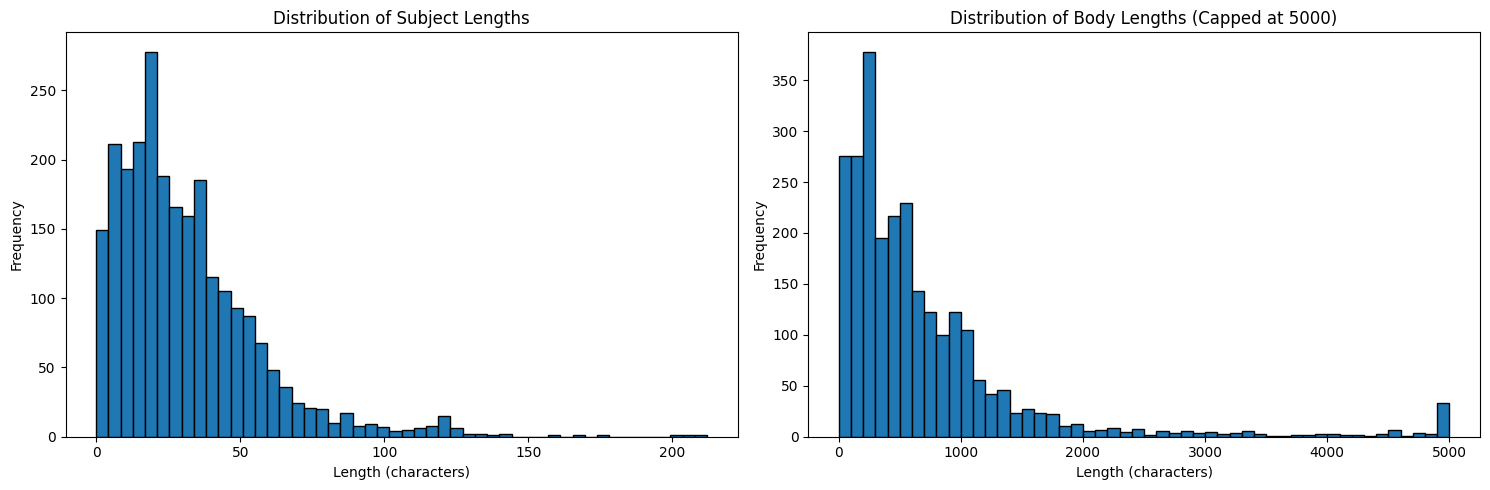

In [18]:
import matplotlib.pyplot as plt

# Calculate lengths
subject_lengths = df['Subject'].str.len()
body_lengths = df['Body'].str.len().clip(upper=5000)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot subject length histogram
ax1.hist(subject_lengths, bins=50, edgecolor='black')
ax1.set_title('Distribution of Subject Lengths')
ax1.set_xlabel('Length (characters)')
ax1.set_ylabel('Frequency')

# Plot body length histogram 
ax2.hist(body_lengths, bins=50, edgecolor='black')
ax2.set_title('Distribution of Body Lengths (Capped at 5000)')
ax2.set_xlabel('Length (characters)')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


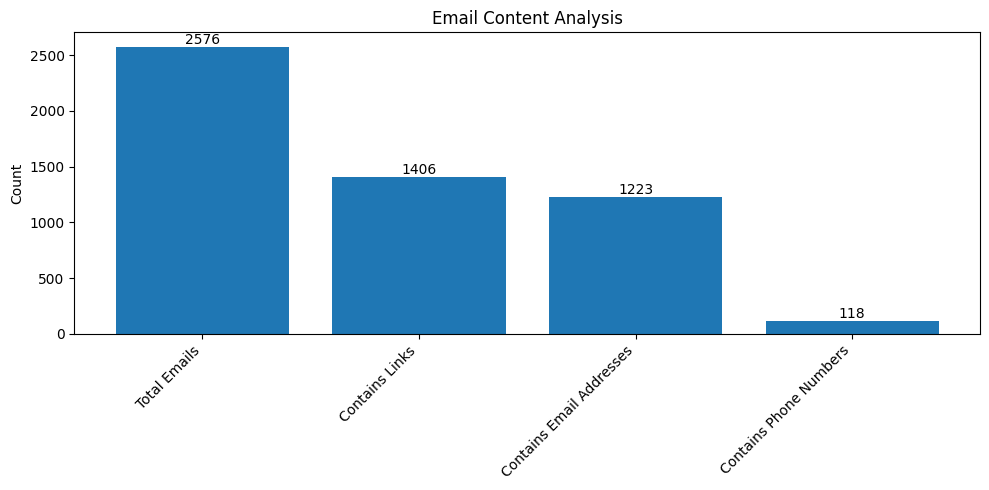

In [19]:
# Calculate counts
total_emails = len(df)
link_count = df['Body'].str.contains('http').sum()
email_addr_count = df['Body'].str.contains('@').sum()
phone_count = df['Body'].str.contains('phone').sum()

# Create bar chart
plt.figure(figsize=(10, 5))
categories = ['Total Emails', 'Contains Links', 'Contains Email Addresses', 'Contains Phone Numbers']
counts = [total_emails, link_count, email_addr_count, phone_count]

plt.bar(categories, counts)
plt.xticks(rotation=45, ha='right')
plt.title('Email Content Analysis')
plt.ylabel('Count')

# Add value labels on top of each bar
for i, v in enumerate(counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()


[nltk_data] Downloading package punkt to /home/dustinvan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/dustinvan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/dustinvan/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


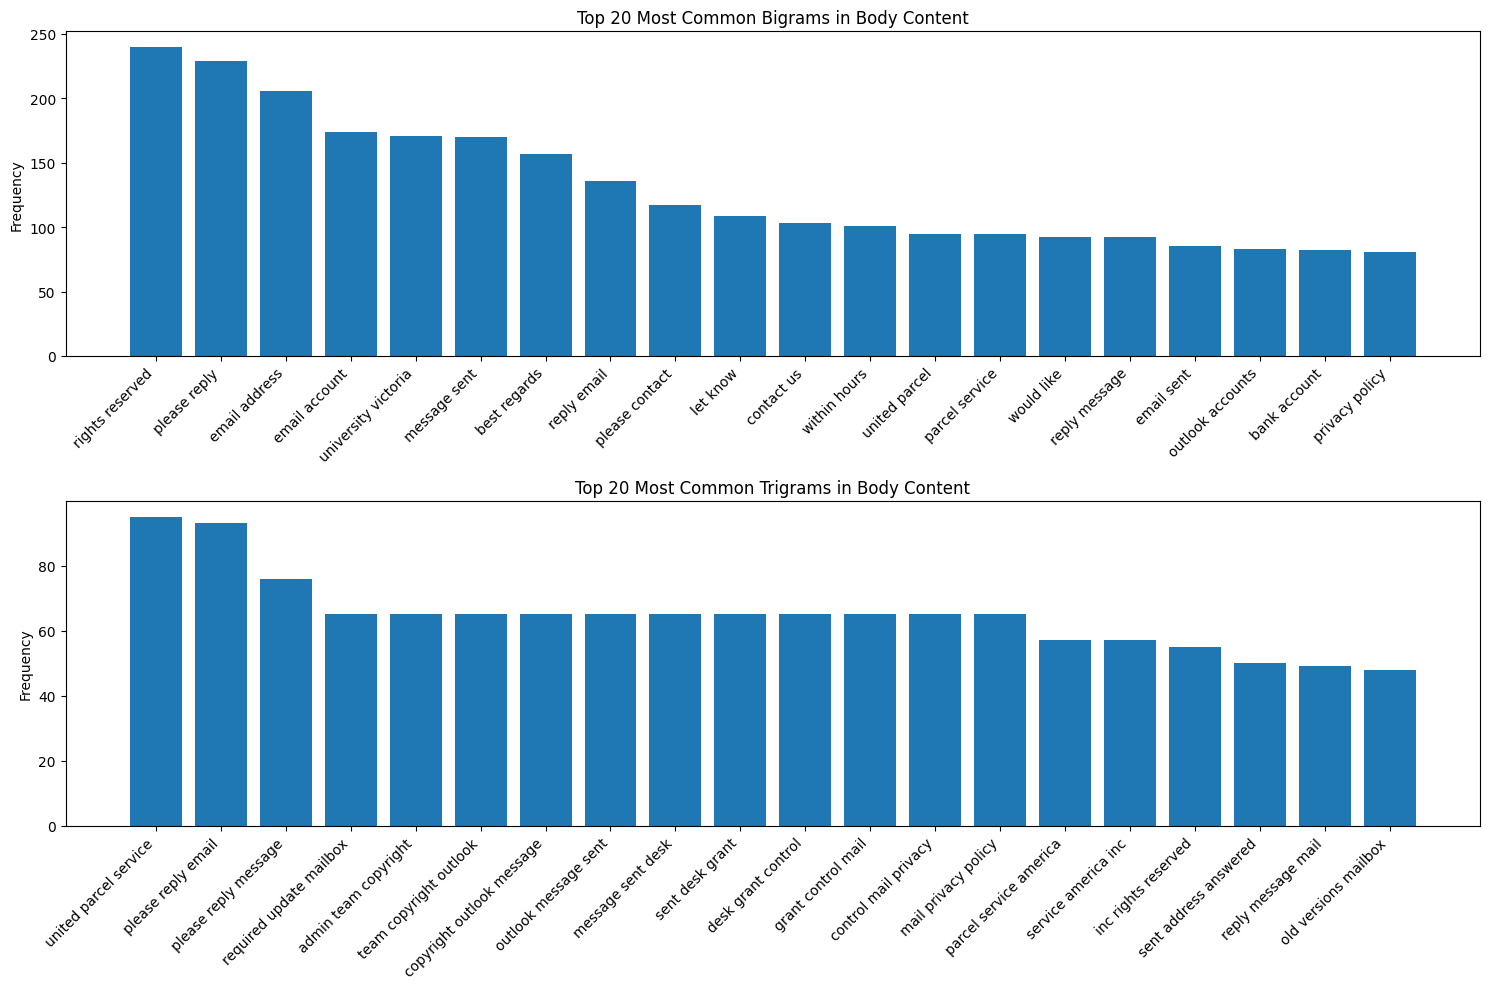

In [20]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter
from nltk.corpus import stopwords
import re

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

# Function to get n-grams and their frequencies
def get_ngrams(text_list, n):
    all_ngrams = []
    for text in text_list:
        tokens = preprocess_text(text)
        text_ngrams = list(ngrams(tokens, n))
        # Filter out nonsensical trigrams
        if n == 3:
            text_ngrams = [gram for gram in text_ngrams 
                         if all(len(word) > 1 and len(word) < 10 for word in gram)  # Remove single letter words
                         and not all(word == gram[0] for word in gram)  # Remove repetitive words
                         and sum(len(word) for word in gram) > 6]  # Ensure reasonable total length
        all_ngrams.extend(text_ngrams)
    return Counter(all_ngrams)

# Perform n-gram analysis for n=2 (bigrams) and n=3 (trigrams)
bigrams = get_ngrams(df['Body'].dropna(), 2)
trigrams = get_ngrams(df['Body'].dropna(), 3)

# Create bar plots for top 20 bigrams and trigrams
plt.figure(figsize=(15, 10))

# Plot bigrams
plt.subplot(2, 1, 1)
top_bigrams = dict(list(bigrams.most_common(20)))
plt.bar(range(len(top_bigrams)), list(top_bigrams.values()))
plt.xticks(range(len(top_bigrams)), [' '.join(gram) for gram in top_bigrams.keys()], rotation=45, ha='right')
plt.title('Top 20 Most Common Bigrams in Body Content')
plt.ylabel('Frequency')

# Plot trigrams
plt.subplot(2, 1, 2)
top_trigrams = dict(list(trigrams.most_common(20)))
plt.bar(range(len(top_trigrams)), list(top_trigrams.values()))
plt.xticks(range(len(top_trigrams)), [' '.join(gram) for gram in top_trigrams.keys()], rotation=45, ha='right')
plt.title('Top 20 Most Common Trigrams in Body Content')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [21]:
# Perform n-gram analysis on Subject field
subject_bigrams = get_ngrams(df['Subject'].dropna(), 2)
subject_trigrams = get_ngrams(df['Subject'].dropna(), 3)

print("\nTop 10 most common bigrams in Subject:")
for gram, count in subject_bigrams.most_common(10):
    print(f"{gram}: {count}")

print("\nTop 10 most common trigrams in Subject:")
for gram, count in subject_trigrams.most_common(10):
    print(f"{gram}: {count}")



Top 10 most common bigrams in Subject:
('university', 'victoria'): 55
('good', 'day'): 41
('action', 'required'): 39
('email', 'account'): 20
('private', 'parcel'): 20
('victoria', 'webmail'): 20
('hello', 'dear'): 17
('password', 'expired'): 16
('order', 'id'): 15
('ca', 'private'): 15

Top 10 most common trigrams in Subject:
('ca', 'private', 'parcel'): 15
('arvind', 'client', 'service'): 9
('shipment', 'details', 'item'): 8
('human', 'research', 'ethics'): 8
('dhanya', 'arvind', 'client'): 8
('email', 'password', 'expired'): 7
('service', 'help', 'desk'): 7
('delivery', 'scheduled', 'ca'): 7
('scheduled', 'ca', 'private'): 7
('research', 'ethics', 'liaison'): 7


In [22]:
# Count individual word frequencies
def get_word_frequencies(text_list):
    all_words = []
    for text in text_list:
        tokens = preprocess_text(text)
        all_words.extend(tokens)
    return Counter(all_words)

# Get word frequencies for both Body and Subject
body_words = get_word_frequencies(df['Body'].dropna())
subject_words = get_word_frequencies(df['Subject'].dropna())

print("\nTop 20 most common words in Body:")
for word, count in body_words.most_common(20):
    print(f"{word}: {count}")

print("\nTop 20 most common words in Subject:")
for word, count in subject_words.most_common(20):
    print(f"{word}: {count}")



Top 20 most common words in Body:
email: 2090
please: 1434
account: 1232
message: 866
information: 570
dear: 565
sent: 563
contact: 536
payment: 515
address: 506
us: 500
service: 489
reply: 469
details: 448
password: 425
regards: 415
uvicca: 414
hello: 399
update: 392
delivery: 390

Top 20 most common words in Subject:
email: 119
notification: 117
account: 95
hello: 91
fw: 91
update: 87
payment: 85
urgent: 82
password: 75
new: 73
order: 70
delivery: 66
uvicca: 65
helpdeskuvicca: 62
university: 62
action: 60
victoria: 60
required: 58
request: 58
good: 55



Frequency of suspicious words found in the dataset:
account: 873
update: 518
click: 480
payment: 422
confirm: 304
notice: 285
notification: 281
password: 281
required: 264
immediate: 219
urgent: 208
bank: 208
security: 199
invoice: 188
immediately: 185
upgrade: 167
important: 164
copyright: 164
transfer: 163
fee: 162
login: 154
transaction: 150
pending: 139
policy: 130
charge: 130
verify: 128
secure: 124
subscription: 118
protect: 117
attention: 110
hold: 108
deposit: 104
statement: 99
expires: 98
24 hours: 96
legal: 96
terms: 95
alert: 94
download: 84
credit: 79
blocked: 72
refund: 65
expired: 58
debit: 57
agreement: 55
billing: 51
balance: 50
unauthorized: 50
suspended: 49
profile: 44
validate: 40
official: 36
limited: 36
sign in: 33
restore: 31
authenticate: 28
risk: 27
reset: 26
suspicious: 25
reactivate: 24
unusual: 23
disabled: 22
restricted: 20
mandatory: 18
fraud: 18
compliance: 13
credentials: 12
threat: 11
limited time: 11
username: 9
terminated: 9
unlock: 5
compromised: 4
b

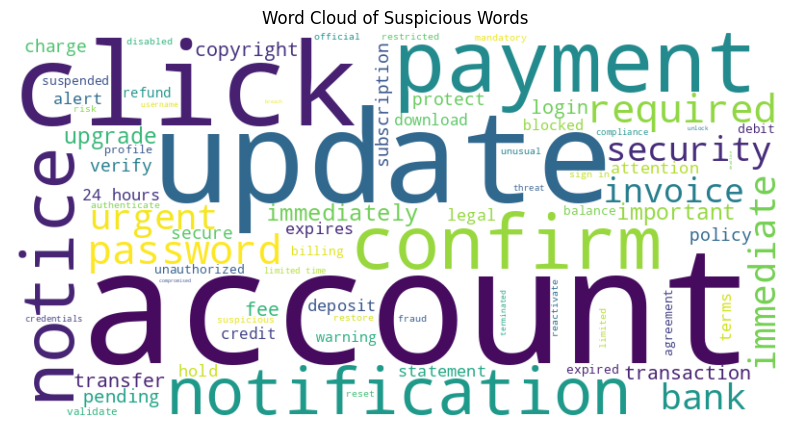

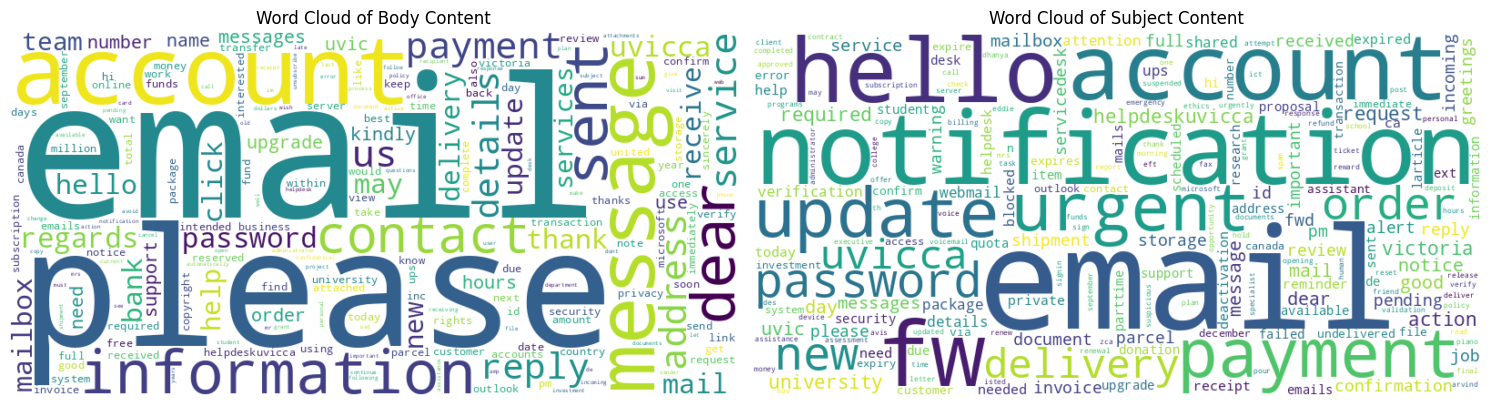

In [23]:
# Define a list of suspicious words and patterns commonly found in phishing emails
suspicious_words = [
    # Account-related
    'account', 'login', 'password', 'username', 'credentials', 'profile', 'subscription',
    
    # Action words
    'verify', 'confirm', 'validate', 'update', 'upgrade', 'click', 'download', 'sign in',
    'authenticate', 'reactivate', 'restore', 'reset', 'unlock',
    
    # Status/Warning words 
    'suspended', 'disabled', 'expired', 'terminated', 'blocked', 'restricted', 'limited',
    'unauthorized', 'suspicious', 'unusual', 'warning', 'alert', 'important', 'urgent',
    'immediate', 'attention', 'required', 'mandatory', 'hold', 'pending',
    
    # Security-related
    'security', 'fraud', 'breach', 'compromised', 'risk', 'threat', 'protect', 'secure',
    'safeguard', 'verify identity', 'authentication required',
    
    # Financial terms
    'bank', 'credit', 'debit', 'payment', 'transaction', 'transfer', 'balance', 'refund',
    'billing', 'invoice', 'statement', 'fee', 'charge', 'deposit',
    
    # Time pressure
    'expires', 'deadline', 'immediately', '24 hours', 'limited time', 'act now',
    'time sensitive', 'urgent action',
    
    # Legal/Official sounding
    'legal', 'copyright', 'policy', 'terms', 'agreement', 'compliance', 'official',
    'notification', 'notice', 'advisory'
]

# Function to check for suspicious words in text
def find_suspicious_words(text, suspicious_list):
    if not isinstance(text, str):
        return []
    text = text.lower()
    return [word for word in suspicious_list if word in text]

# Find suspicious words in both Subject and Body
suspicious_in_subject = df['Subject'].apply(lambda x: find_suspicious_words(x, suspicious_words))
suspicious_in_body = df['Body'].apply(lambda x: find_suspicious_words(x, suspicious_words))

# Count total occurrences of each suspicious word
suspicious_word_counts = Counter()
for words in suspicious_in_subject:
    suspicious_word_counts.update(words)
for words in suspicious_in_body:
    suspicious_word_counts.update(words)

print("\nFrequency of suspicious words found in the dataset:")
for word, count in suspicious_word_counts.most_common():
    print(f"{word}: {count}")


# Create word clouds for suspicious words
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create word cloud from suspicious word frequencies
wordcloud = WordCloud(width=800, height=400, 
                        background_color='white').generate_from_frequencies(dict(suspicious_word_counts))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Suspicious Words')
plt.show()

# Create separate word clouds for Body and Subject content
plt.figure(figsize=(15, 5))

# Body word cloud
plt.subplot(1, 2, 1)
wordcloud_body = WordCloud(width=800, height=400,
                            background_color='white').generate_from_frequencies(dict(body_words))
plt.imshow(wordcloud_body, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Body Content')

# Subject word cloud 
plt.subplot(1, 2, 2)
wordcloud_subject = WordCloud(width=800, height=400,
                            background_color='white').generate_from_frequencies(dict(subject_words))
plt.imshow(wordcloud_subject, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Subject Content')

plt.tight_layout()
plt.show()



Most common domains in email bodies:
ups.com: 119
t.notifications.canadapost-postescanada.ca: 95
s3.amazonaws.com: 73
log.microsoftonline.com: 65
suaccounservi.brizy.site: 65
static.cdn.responsys.net: 60
firebasestorage.googleapis.com: 53
uvic.ca>: 53
c3acu228.caspio.com: 39
bit.ly: 36


Text(0.5, 1.0, 'Domains Found in Body Content')

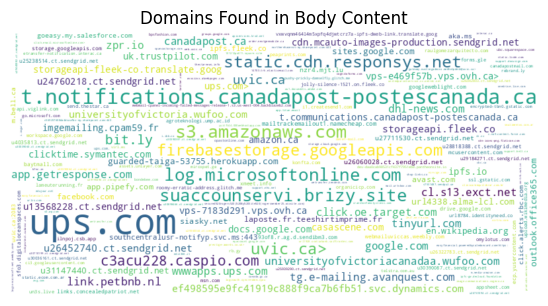

In [24]:
import re
from urllib.parse import urlparse

# Function to extract domains from URLs in text
def extract_domains(text):
    # URL pattern that matches common URL formats
    url_pattern = r'https?://(?:www\.)?([^\s/]+)'
    domains = re.findall(url_pattern, str(text))
    return domains

# Extract domains from Body and Subject
body_domains = []
subject_domains = []

for body in df['Body']:
    domains = extract_domains(body)
    body_domains.extend(domains)
    
for subject in df['Subject']:
    domains = extract_domains(subject)
    subject_domains.extend(domains)

# Count domain frequencies
from collections import Counter
body_domain_counts = Counter(body_domains)
subject_domain_counts = Counter(subject_domains)

print("\nMost common domains in email bodies:")
for domain, count in body_domain_counts.most_common(10):
    print(f"{domain}: {count}")


# Create word clouds for domains
plt.figure(figsize=(15, 5))

# Body domains word cloud
plt.subplot(1, 2, 1)
if body_domain_counts:
    wordcloud_body_domains = WordCloud(width=800, height=400,
                                     background_color='white').generate_from_frequencies(body_domain_counts)
    plt.imshow(wordcloud_body_domains, interpolation='bilinear')
plt.axis('off')
plt.title('Domains Found in Body Content')


Message generated from  uvic.ca source.


Sender          Action Required


                Messages suspended



Message Failure Delivery Notice.
User: helpdesk@uvic.ca

You have (6) Suspended incoming messages

Please Fix It Below

Click Confirmation Here <https://googleweblight.com/i?u=https://cloudflare-ipfs.com/ipfs/bafybeifa7d5wbveq4lrfajxhefoeyni7lt4bsd5tszbmlxkhjjt4dysrbm/#helpdesk@uvic.ca>  To View Incoming Suspended Messages And Retrieve Them.

Created Date: 12/22/2023 8:13:39 a.m.



The information contained in or attached to this communication is intended solely for the use of the individual or entity to whom it is addressed and others authorized to receive it. It may contain confidential or legally privileged information. If you are not the intended recipient you are hereby notified that any disclosure, copying, distribution or taking any action in reliance on the contents of this information is strictly prohibited and may be unlawful. If you have received this communicat

Text(0.5, 1.0, 'Email Addresses Found in Body Content')

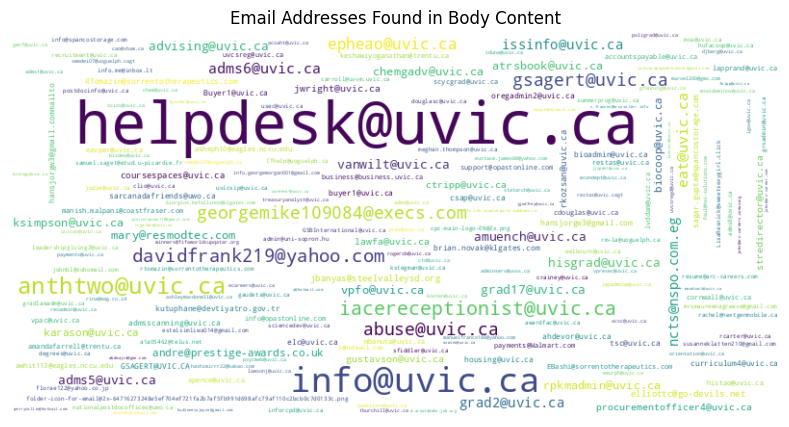

In [26]:
# Function to extract email addresses from text
def extract_emails(text):
    email_pattern = r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}'
    emails = re.findall(email_pattern, str(text))
    return emails

# Extract email addresses from Body and Subject
body_emails = []
subject_emails = []

for body in df['Body']:
    if 'helpdesk@' in str(body).lower() or 'info@' in str(body).lower():
        print(body)
    emails = extract_emails(body)
    body_emails.extend(emails)
    
for subject in df['Subject']:
    emails = extract_emails(subject)
    subject_emails.extend(emails)

# Count email frequencies
body_email_counts = Counter(body_emails)
subject_email_counts = Counter(subject_emails)

print("\nMost common email addresses in email bodies:")
for email, count in body_email_counts.most_common(10):
    print(f"{email}: {count}")

# Create word cloud for email addresses
plt.figure(figsize=(15, 5))

# Body emails word cloud
plt.subplot(1, 1, 1)
if body_email_counts:
    wordcloud_body_emails = WordCloud(width=800, height=400,
                                    background_color='white').generate_from_frequencies(body_email_counts)
    plt.imshow(wordcloud_body_emails, interpolation='bilinear')
plt.axis('off')
plt.title('Email Addresses Found in Body Content')



Most common phone numbers in email bodies:
578.578.5783: 21
2022122020: 8
1935796064: 8
(833) 203 6998: 8
888 462 3009: 8
7077623717: 8
877-376-1212: 7
888-407-0407: 6
(833) 200 5187: 6
2022120116: 6


Text(0.5, 1.0, 'Phone Numbers Found in Body Content')

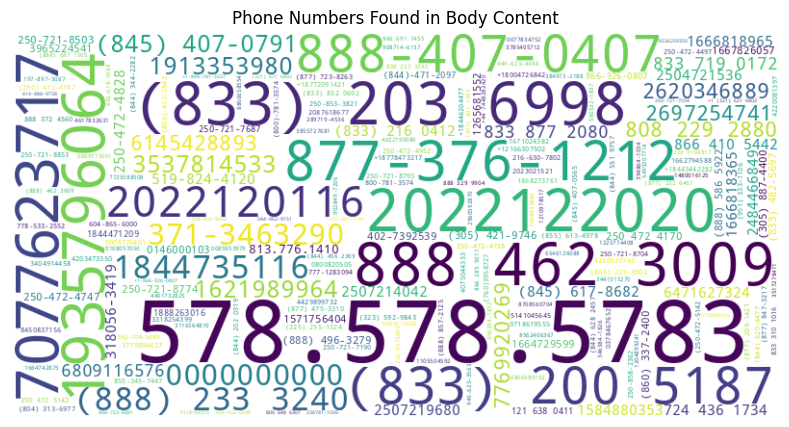

In [63]:
# Function to extract phone numbers from text
def extract_phone_numbers(text):
    # Pattern for various phone number formats including international
    phone_pattern = r'(?:\+\d{1,3}[-.\s]?)?\(?\d{3}\)?[-.\s]?\d{3}[-.\s]?\d{4}'
    phone_numbers = re.findall(phone_pattern, str(text))
    return phone_numbers

# Extract phone numbers from Body and Subject
body_phones = []
subject_phones = []

for body in df['Body']:
    phones = extract_phone_numbers(body)
    body_phones.extend(phones)
    
for subject in df['Subject']:
    phones = extract_phone_numbers(subject)
    subject_phones.extend(phones)

# Count phone number frequencies
body_phone_counts = Counter(body_phones)
subject_phone_counts = Counter(subject_phones)

print("\nMost common phone numbers in email bodies:")
for phone, count in body_phone_counts.most_common(10):
    print(f"{phone}: {count}")

# Create word cloud for phone numbers
plt.figure(figsize=(15, 5))

# Body phone numbers word cloud
plt.subplot(1, 1, 1)
if body_phone_counts:
    wordcloud_body_phones = WordCloud(width=800, height=400,
                                    background_color='white').generate_from_frequencies(body_phone_counts)
    plt.imshow(wordcloud_body_phones, interpolation='bilinear')
plt.axis('off')
plt.title('Phone Numbers Found in Body Content')
